# Etapa 2 - Exploración de Datos

**Proyecto:** Ciencia de Datos - Preparación de Datos  
**Universidad:** Pontificia Universidad Javeriana  
**Curso:** Tecnologías Emergentes 2025  
**Profesor:** Luis Carlos Chicaíza

---

## Objetivo de esta Etapa

Realizar un análisis exploratorio exhaustivo del dataset de accidentes de tránsito en Bucaramanga, incluyendo:
1. Tabla de diagnóstico de calidad de datos
2. Visualizaciones con análisis interpretativo
3. Análisis de correlaciones

**Pregunta Guía:** ¿Qué factores (temporales, espaciales y características del accidente) están asociados con la mayor gravedad y frecuencia de accidentes de tránsito en Bucaramanga?

## 1. Configuración Inicial

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Configuración de visualización
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Tamaño de figuras por defecto
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas y configuradas")

✓ Librerías importadas y configuradas


## 2. Carga del Dataset

In [2]:
# Cargar dataset
df = pd.read_csv('../data/raw/accidentes_transito.csv')

print(f"Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"Periodo: {df['AÑO'].min()} - {df['AÑO'].max()}")

Dataset cargado exitosamente
Dimensiones: 39,193 filas x 24 columnas
Periodo: 2012 - 2023


In [3]:
# Vista previa
df.head()

,ORDEN,FECHA,AÑO,MES,DÍA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO,BARRIO,HORA,ENTIDAD,COMUNA,Propietario de Vehículo,DIURNIO/NOCTURNO
0,1,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Con heridos,0,1,0,0,0,0,0,0,0,0,0,0,Mutis,1899-12-31T12:15:00.000,AGENTES DTB,17. MUTIS,Particular,Diurno
1,2,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Solo daños,0,1,0,1,0,0,0,0,0,0,0,0,Regaderos Norte,1899-12-31T14:00:00.000,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno
2,3,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Solo daños,0,0,0,1,0,0,0,0,0,0,0,0,Cabecera Del Llano,1899-12-31T12:00:00.000,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno
3,4,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Solo daños,0,1,0,1,0,0,0,0,0,0,0,0,Norte Bajo,1899-12-31T18:30:00.000,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno
4,5,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Con heridos,1,0,0,0,0,0,0,0,0,1,0,0,Dangond,1899-12-31T00:30:00.000,AGENTES DTB,11. SUR,Particular,Nocturno


## 3. Tabla de Diagnóstico de Calidad de Datos

Análisis exhaustivo de la calidad del dataset según los criterios del proyecto:
- Porcentaje de valores nulos
- Cardinalidad (valores únicos)
- Rangos atípicos
- Tipos de datos
- Inconsistencias

In [4]:
def crear_tabla_diagnostico(df):
    """
    Crea tabla de diagnóstico de calidad de datos
    """
    diagnostico = pd.DataFrame({
        'Columna': df.columns,
        'Tipo_Dato': df.dtypes.values,
        'Total_Registros': len(df),
        'Valores_Nulos': df.isnull().sum().values,
        '%_Nulos': (df.isnull().sum() / len(df) * 100).values,
        'Valores_Unicos': [df[col].nunique() for col in df.columns],
        'Cardinalidad': [f"{df[col].nunique() / len(df) * 100:.1f}%" for col in df.columns],
    })
    
    # Agregar información de valores únicos para columnas categóricas
    ejemplos = []
    for col in df.columns:
        if df[col].nunique() <= 5:
            ejemplos.append(str(df[col].unique()[:5].tolist())[:50])
        elif df[col].dtype == 'object':
            ejemplos.append(f"Ej: {df[col].iloc[0]}"[:50])
        else:
            ejemplos.append(f"Rango: [{df[col].min()}, {df[col].max()}]")
    
    diagnostico['Valores_Ejemplo'] = ejemplos
    
    return diagnostico

# Crear tabla de diagnóstico
tabla_diagnostico = crear_tabla_diagnostico(df)

print("="*100)
print("TABLA DE DIAGNÓSTICO DE CALIDAD DE DATOS")
print("="*100)
tabla_diagnostico

TABLA DE DIAGNÓSTICO DE CALIDAD DE DATOS


,Columna,Tipo_Dato,Total_Registros,Valores_Nulos,%_Nulos,Valores_Unicos,Cardinalidad,Valores_Ejemplo
0,ORDEN,int64,39193,0,0.00,39193,100.0%,"Rango: [1, 39193]"
1,FECHA,object,39193,0,0.00,4264,10.9%,Ej: 2012-01-01T00:00:00.000
2,AÑO,int64,39193,0,0.00,12,0.0%,"Rango: [2012, 2023]"
3,MES,object,39193,0,0.00,12,0.0%,Ej: 01. Enero
4,DÍA,object,39193,0,0.00,7,0.0%,Ej: 07. Domingo
5,GRAVEDAD,object,39193,0,0.00,4,0.0%,"['Con heridos', 'Solo daños', 'Con muertos', '..."
6,PEATON,int64,39193,0,0.00,8,0.0%,"Rango: [0, 7]"
7,AUTOMOVIL,int64,39193,0,0.00,10,0.0%,"Rango: [0, 29]"
8,CAMPERO,int64,39193,0,0.00,3,0.0%,"[0, 1, 2]"
9,CAMIONETA,int64,39193,0,0.00,4,0.0%,"[0, 1, 2, 3]"


In [5]:
# Resumen de calidad
print("="*80)
print("RESUMEN DE CALIDAD DE DATOS")
print("="*80)
print(f"\n✓ Total de registros: {len(df):,}")
print(f"✓ Total de columnas: {len(df.columns)}")
print(f"\n📊 VALORES NULOS:")
total_nulos = df.isnull().sum().sum()
pct_nulos = total_nulos / (len(df) * len(df.columns)) * 100
print(f"   Total valores nulos: {total_nulos:,} ({pct_nulos:.2f}%)")
if total_nulos == 0:
    print("   ✓ Dataset sin valores faltantes - EXCELENTE")

print(f"\n📊 DUPLICADOS:")
duplicados = df.duplicated().sum()
print(f"   Filas duplicadas: {duplicados:,}")
if duplicados == 0:
    print("   ✓ Sin duplicados - EXCELENTE")

print(f"\n📊 CARDINALIDAD:")
print(f"   Variables de alta cardinalidad (>50% valores únicos):")
alta_card = tabla_diagnostico[tabla_diagnostico['Valores_Unicos'] / len(df) > 0.5]
for idx, row in alta_card.iterrows():
    print(f"     - {row['Columna']}: {row['Valores_Unicos']:,} valores únicos ({row['Cardinalidad']})")

print(f"\n   Variables de baja cardinalidad (<10 valores únicos):")
baja_card = tabla_diagnostico[tabla_diagnostico['Valores_Unicos'] < 10]
for idx, row in baja_card.iterrows():
    print(f"     - {row['Columna']}: {row['Valores_Unicos']} valores únicos")

RESUMEN DE CALIDAD DE DATOS

✓ Total de registros: 39,193
✓ Total de columnas: 24

📊 VALORES NULOS:
   Total valores nulos: 0 (0.00%)
   ✓ Dataset sin valores faltantes - EXCELENTE

📊 DUPLICADOS:
   Filas duplicadas: 0
   ✓ Sin duplicados - EXCELENTE

📊 CARDINALIDAD:
   Variables de alta cardinalidad (>50% valores únicos):
     - ORDEN: 39,193 valores únicos (100.0%)

   Variables de baja cardinalidad (<10 valores únicos):
     - DÍA: 7 valores únicos
     - GRAVEDAD: 4 valores únicos
     - PEATON: 8 valores únicos
     - CAMPERO: 3 valores únicos
     - CAMIONETA: 4 valores únicos
     - MICRO: 3 valores únicos
     - BUSETA: 3 valores únicos
     - BUS: 3 valores únicos
     - CAMION: 4 valores únicos
     - VOLQUETA: 3 valores únicos
     - MOTO: 9 valores únicos
     - BICICLETA: 4 valores únicos
     - OTRO: 3 valores únicos
     - ENTIDAD: 2 valores únicos
     - Propietario de Vehículo: 2 valores únicos
     - DIURNIO/NOCTURNO: 2 valores únicos


### 3.1 Detección de Rangos Atípicos e Inconsistencias

In [6]:
# Análisis de variables numéricas
print("="*80)
print("ANÁLISIS DE RANGOS - VARIABLES NUMÉRICAS")
print("="*80)

# Columnas de vehículos (numéricas)
vehiculos_cols = ['PEATON', 'AUTOMOVIL', 'CAMPERO', 'CAMIONETA', 'MICRO',
                  'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO']

stats_vehiculos = df[vehiculos_cols].describe().T
stats_vehiculos['rango'] = stats_vehiculos['max'] - stats_vehiculos['min']

print("\nEstadísticas de vehículos involucrados:")
print(stats_vehiculos[['mean', 'std', 'min', 'max', 'rango']])

# Detectar valores extremos
print("\n⚠️  VALORES EXTREMOS DETECTADOS:")
for col in vehiculos_cols:
    max_val = df[col].max()
    if max_val > 10:  # Más de 10 vehículos del mismo tipo es atípico
        count = (df[col] > 10).sum()
        print(f"   - {col}: {count} accidentes con más de 10 vehículos (máximo: {max_val})")

ANÁLISIS DE RANGOS - VARIABLES NUMÉRICAS

Estadísticas de vehículos involucrados:
           mean  std  min   max  rango
PEATON     0.11 0.34 0.00  7.00   7.00
AUTOMOVIL  0.78 0.74 0.00 29.00  29.00
CAMPERO    0.06 0.24 0.00  2.00   2.00
CAMIONETA  0.20 0.43 0.00  3.00   3.00
MICRO      0.02 0.14 0.00  2.00   2.00
BUSETA     0.04 0.21 0.00  2.00   2.00
BUS        0.05 0.22 0.00  2.00   2.00
CAMION     0.08 0.29 0.00  3.00   3.00
VOLQUETA   0.01 0.12 0.00  2.00   2.00
MOTO       0.63 0.65 0.00  8.00   8.00
BICICLETA  0.02 0.13 0.00  3.00   3.00
OTRO       0.02 0.15 0.00  2.00   2.00

⚠️  VALORES EXTREMOS DETECTADOS:
   - AUTOMOVIL: 3 accidentes con más de 10 vehículos (máximo: 29)


In [7]:
# Detección de inconsistencias en variables categóricas
print("="*80)
print("DETECCIÓN DE INCONSISTENCIAS")
print("="*80)

# Problema detectado: "Con muertos" vs "Con Muertos"
print("\n⚠️  GRAVEDAD - Inconsistencia detectada:")
print(df['GRAVEDAD'].value_counts())
print("\n   → Problema: 'Con muertos' y 'Con Muertos' (diferencia en mayúsculas)")
print("   → Solución: Debe unificarse en Etapa 3 (Limpieza)")

# Verificar formato de HORA
print("\n⚠️  HORA - Formato inusual:")
print(f"   Ejemplos: {df['HORA'].head(3).tolist()}")
print("   → Problema: Formato datetime con fecha base 1899-12-31")
print("   → Solución: Extraer solo la hora en Etapa 3 (Limpieza)")

# Barrios NO DISPONIBLE
print("\n⚠️  BARRIO - Valores no disponibles:")
no_disp = (df['BARRIO'] == 'NO DISPONIBLE').sum()
pct_no_disp = no_disp / len(df) * 100
print(f"   Registros con 'NO DISPONIBLE': {no_disp:,} ({pct_no_disp:.2f}%)")
print("   → Decisión: Mantener como categoría válida (no es un valor faltante real)")

DETECCIÓN DE INCONSISTENCIAS

⚠️  GRAVEDAD - Inconsistencia detectada:
GRAVEDAD
Solo daños     19602
Con heridos    18982
Con muertos      503
Con Muertos      106
Name: count, dtype: int64

   → Problema: 'Con muertos' y 'Con Muertos' (diferencia en mayúsculas)
   → Solución: Debe unificarse en Etapa 3 (Limpieza)

⚠️  HORA - Formato inusual:
   Ejemplos: ['1899-12-31T12:15:00.000', '1899-12-31T14:00:00.000', '1899-12-31T12:00:00.000']
   → Problema: Formato datetime con fecha base 1899-12-31
   → Solución: Extraer solo la hora en Etapa 3 (Limpieza)

⚠️  BARRIO - Valores no disponibles:
   Registros con 'NO DISPONIBLE': 1,553 (3.96%)
   → Decisión: Mantener como categoría válida (no es un valor faltante real)


### 📋 Conclusiones del Diagnóstico de Calidad

**Fortalezas:**
- ✅ Dataset completo: 0% valores nulos
- ✅ Sin duplicados
- ✅ 39,193 registros válidos (muy por encima del mínimo de 2,000)
- ✅ 24 atributos (el doble del mínimo de 12)
- ✅ Cobertura temporal extensa: 12 años (2012-2023)

**Problemas Identificados (a corregir en Etapa 3):**
1. **Inconsistencia en GRAVEDAD:** "Con muertos" vs "Con Muertos" → Unificar
2. **Formato de HORA:** Datetime con fecha base incorrecta → Extraer solo hora
3. **Barrios NO DISPONIBLE:** 3.96% de registros → Mantener como categoría

**Variables de Alta Cardinalidad:**
- ORDEN: Identificador único (100%)
- FECHA: 4,264 fechas diferentes
- HORA: 1,138 horas únicas
- BARRIO: 186 barrios diferentes

**Variables de Baja Cardinalidad (categóricas útiles):**
- GRAVEDAD: 4 categorías
- DÍA: 7 días de la semana
- ENTIDAD: 2 entidades (DTB, Policía Nacional)
- DIURNIO/NOCTURNO: 2 categorías

## 4. Análisis Exploratorio con Visualizaciones

Se realizarán visualizaciones clave con **análisis interpretativo** de cada gráfico.

### 4.1 Distribución Temporal de Accidentes

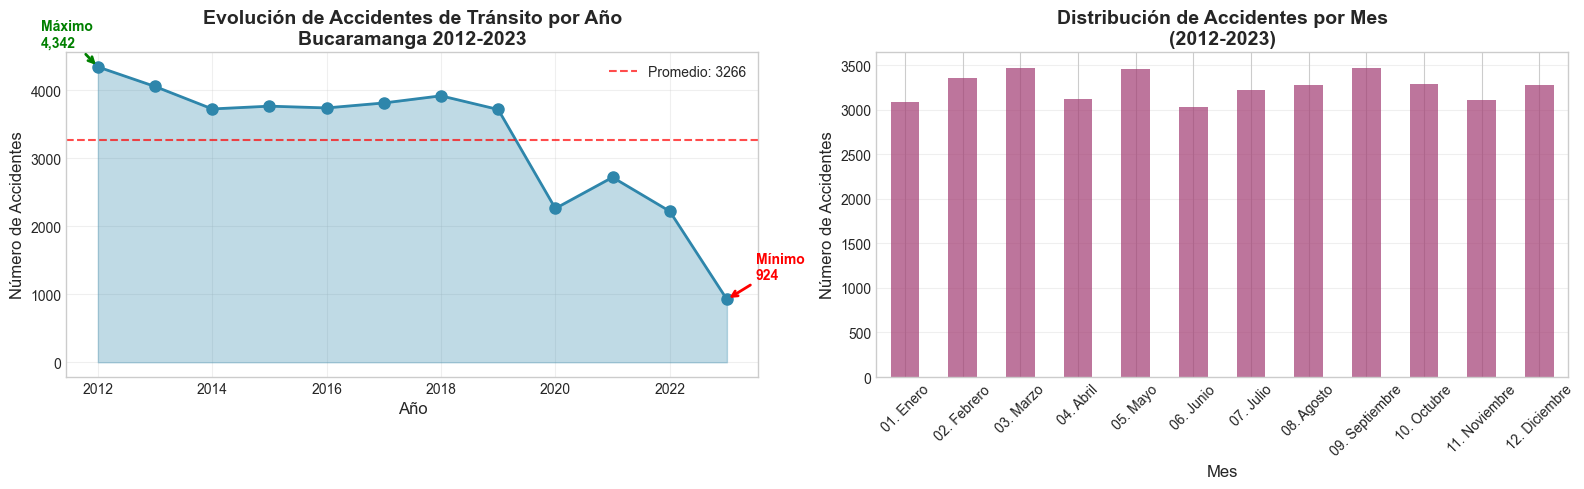


ANÁLISIS: Distribución Temporal

📈 EVOLUCIÓN ANUAL:
   • Año con más accidentes: 2012 (4,342 accidentes)
   • Año con menos accidentes: 2023 (924 accidentes)
   • Promedio anual: 3266 accidentes
   • Reducción 2019→2023: 75.1%

💡 HALLAZGOS:
   1. Tendencia estable 2012-2019 (~3,700-4,300 accidentes/año)
   2. CAÍDA DRÁSTICA en 2020 (-41% vs 2019) → Impacto COVID-19 (cuarentenas, menos movilidad)
   3. Recuperación parcial 2021, pero NO retorna a niveles pre-pandemia
   4. 2023 muestra datos incompletos (solo 924 accidentes)

📊 DISTRIBUCIÓN MENSUAL:
   1. 03. Marzo: 3,473 accidentes
   2. 09. Septiembre: 3,465 accidentes
   3. 05. Mayo: 3,462 accidentes

💡 INTERPRETACIÓN:
   • Distribución relativamente uniforme durante el año
   • No se observan patrones estacionales marcados
   • Pequeñas variaciones pueden deberse a festividades o clima


In [8]:
# Accidentes por año
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1: Evolución anual
accidentes_año = df['AÑO'].value_counts().sort_index()
axes[0].plot(accidentes_año.index, accidentes_año.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0].fill_between(accidentes_año.index, accidentes_año.values, alpha=0.3, color='#2E86AB')
axes[0].set_title('Evolución de Accidentes de Tránsito por Año\nBucaramanga 2012-2023', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Año', fontsize=12)
axes[0].set_ylabel('Número de Accidentes', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=accidentes_año.mean(), color='red', linestyle='--', label=f'Promedio: {accidentes_año.mean():.0f}', alpha=0.7)
axes[0].legend()

# Anotar puntos clave
max_year = accidentes_año.idxmax()
min_year = accidentes_año.idxmin()
axes[0].annotate(f'Máximo\n{accidentes_año[max_year]:,}', xy=(max_year, accidentes_año[max_year]),
                xytext=(max_year-1, accidentes_año[max_year]+300),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, fontweight='bold', color='green')
axes[0].annotate(f'Mínimo\n{accidentes_año[min_year]:,}', xy=(min_year, accidentes_año[min_year]),
                xytext=(min_year+0.5, accidentes_año[min_year]+300),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, fontweight='bold', color='red')

# Gráfico 2: Distribución por mes
df['MES'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='#A23B72', alpha=0.7)
axes[1].set_title('Distribución de Accidentes por Mes\n(2012-2023)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mes', fontsize=12)
axes[1].set_ylabel('Número de Accidentes', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../visualizations/01_distribucion_temporal.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("ANÁLISIS: Distribución Temporal")
print("="*80)
print(f"\n📈 EVOLUCIÓN ANUAL:")
print(f"   • Año con más accidentes: {max_year} ({accidentes_año[max_year]:,} accidentes)")
print(f"   • Año con menos accidentes: {min_year} ({accidentes_año[min_year]:,} accidentes)")
print(f"   • Promedio anual: {accidentes_año.mean():.0f} accidentes")
print(f"   • Reducción 2019→2023: {(1 - accidentes_año[2023]/accidentes_año[2019])*100:.1f}%")
print(f"\n💡 HALLAZGOS:")
print(f"   1. Tendencia estable 2012-2019 (~3,700-4,300 accidentes/año)")
print(f"   2. CAÍDA DRÁSTICA en 2020 (-41% vs 2019) → Impacto COVID-19 (cuarentenas, menos movilidad)")
print(f"   3. Recuperación parcial 2021, pero NO retorna a niveles pre-pandemia")
print(f"   4. 2023 muestra datos incompletos (solo {accidentes_año[2023]:,} accidentes)")
print(f"\n📊 DISTRIBUCIÓN MENSUAL:")
mes_top = df['MES'].value_counts().head(3)
for i, (mes, count) in enumerate(mes_top.items(), 1):
    print(f"   {i}. {mes}: {count:,} accidentes")
print(f"\n💡 INTERPRETACIÓN:")
print(f"   • Distribución relativamente uniforme durante el año")
print(f"   • No se observan patrones estacionales marcados")
print(f"   • Pequeñas variaciones pueden deberse a festividades o clima")

### 4.2 Gravedad de los Accidentes

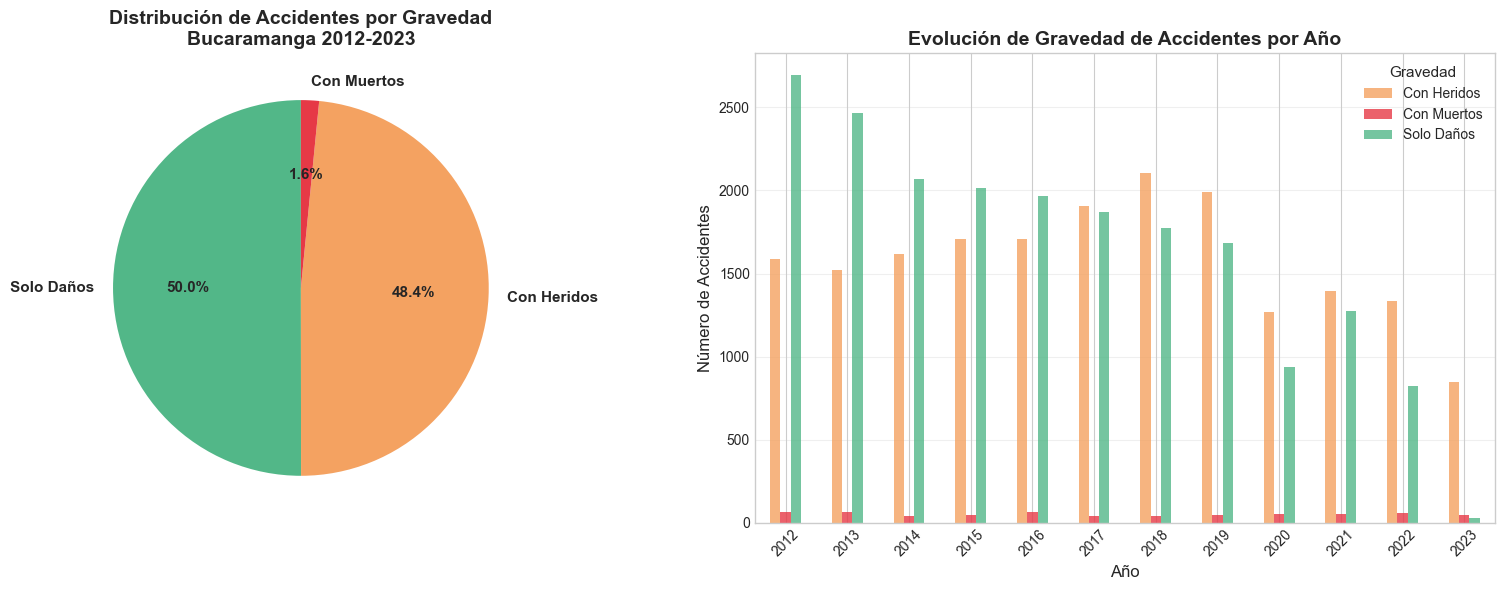


ANÁLISIS: Gravedad de Accidentes
   • Solo Daños     : 19,602 accidentes (50.01%)
   • Con Heridos    : 18,982 accidentes (48.43%)
   • Con Muertos    :    609 accidentes ( 1.55%)

💡 HALLAZGOS CRÍTICOS:
   1. ACCIDENTES GRAVES (con heridos/muertos): 19,591 (50.0%)
   2. ACCIDENTES MORTALES: 609 accidentes (1.55%)
      → Aproximadamente 51 muertes por año promedio
   3. Casi la MITAD de los accidentes resultan en heridos
   4. Solo el 50% son daños materiales únicamente

⚠️  IMPLICACIONES:
   • Alta tasa de accidentes con consecuencias humanas
   • Necesidad urgente de intervenciones preventivas
   • Costo social y de salud significativo para la ciudad


In [9]:
# Unificar gravedad para análisis (temporal, se corregirá en Etapa 3)
df_temp = df.copy()
df_temp['GRAVEDAD_CLEAN'] = df_temp['GRAVEDAD'].str.title()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribución general
gravedad_counts = df_temp['GRAVEDAD_CLEAN'].value_counts()
colors_gravedad = {'Solo Daños': '#52B788', 'Con Heridos': '#F4A261', 'Con Muertos': '#E63946'}
gravedad_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', 
                     colors=[colors_gravedad.get(x, '#999999') for x in gravedad_counts.index],
                     startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0].set_title('Distribución de Accidentes por Gravedad\nBucaramanga 2012-2023', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Gráfico 2: Evolución temporal de gravedad
gravedad_año = pd.crosstab(df_temp['AÑO'], df_temp['GRAVEDAD_CLEAN'])
gravedad_año.plot(kind='bar', stacked=False, ax=axes[1], 
                  color=[colors_gravedad.get(x, '#999999') for x in gravedad_año.columns],
                  alpha=0.8)
axes[1].set_title('Evolución de Gravedad de Accidentes por Año', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Año', fontsize=12)
axes[1].set_ylabel('Número de Accidentes', fontsize=12)
axes[1].legend(title='Gravedad', title_fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../visualizations/02_gravedad_accidentes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("ANÁLISIS: Gravedad de Accidentes")
print("="*80)
for gravedad, count in gravedad_counts.items():
    pct = count / len(df_temp) * 100
    print(f"   • {gravedad:15s}: {count:6,} accidentes ({pct:5.2f}%)")

total_muertos = gravedad_counts.get('Con Muertos', 0)
total_heridos = gravedad_counts.get('Con Heridos', 0)

print(f"\n💡 HALLAZGOS CRÍTICOS:")
print(f"   1. ACCIDENTES GRAVES (con heridos/muertos): {total_heridos + total_muertos:,} ({(total_heridos + total_muertos)/len(df_temp)*100:.1f}%)")
print(f"   2. ACCIDENTES MORTALES: {total_muertos:,} accidentes ({total_muertos/len(df_temp)*100:.2f}%)")
print(f"      → Aproximadamente {total_muertos/12:.0f} muertes por año promedio")
print(f"   3. Casi la MITAD de los accidentes resultan en heridos")
print(f"   4. Solo el 50% son daños materiales únicamente")
print(f"\n⚠️  IMPLICACIONES:")
print(f"   • Alta tasa de accidentes con consecuencias humanas")
print(f"   • Necesidad urgente de intervenciones preventivas")
print(f"   • Costo social y de salud significativo para la ciudad")

### 4.3 Vehículos Involucrados

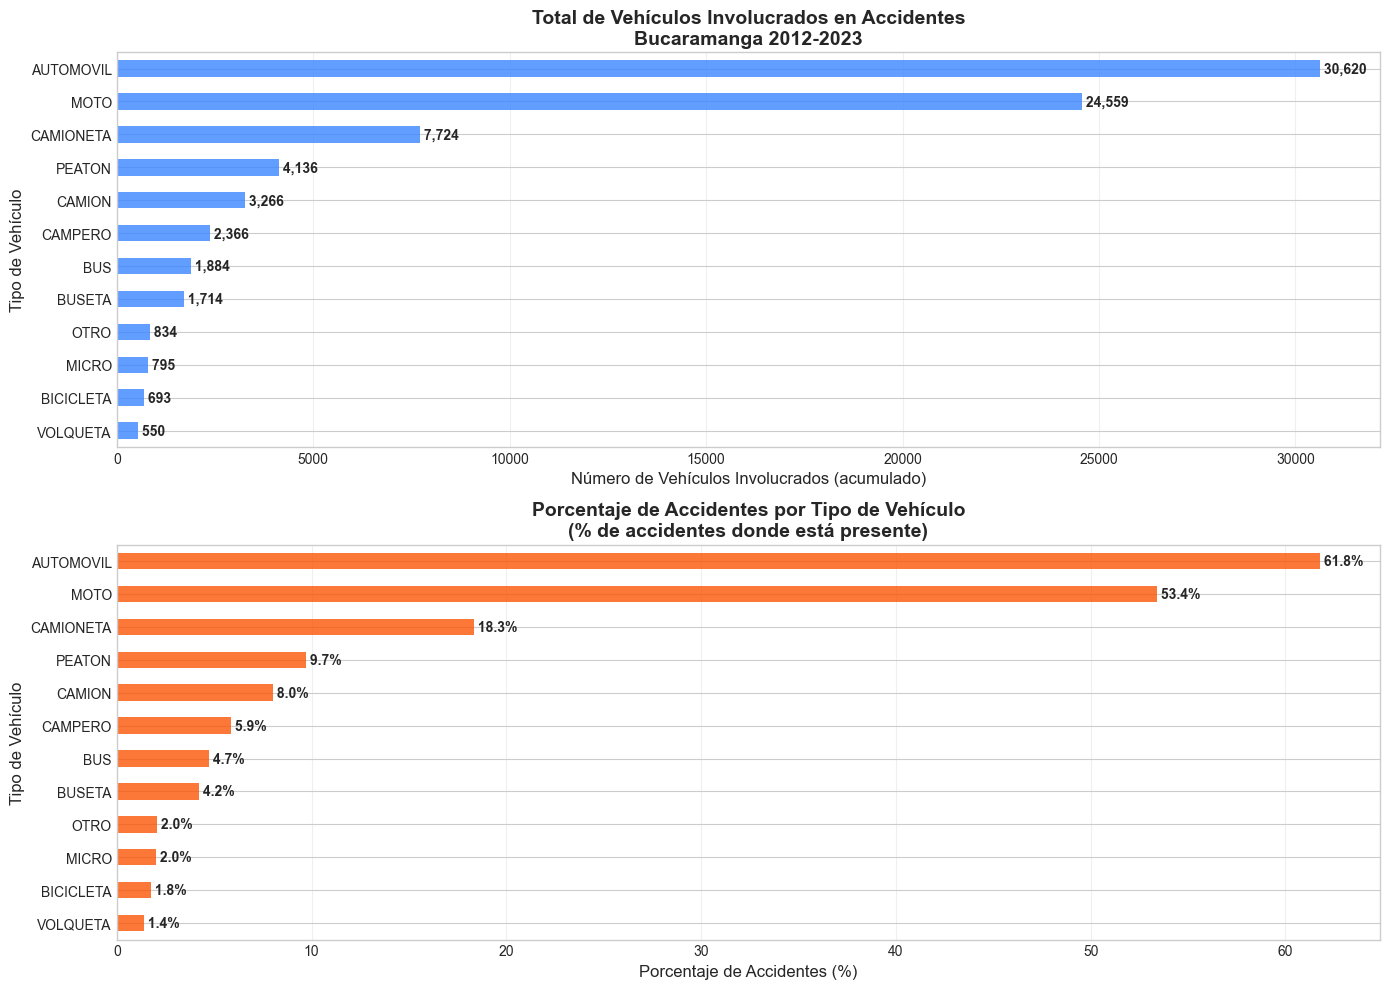


ANÁLISIS: Vehículos Involucrados

📊 TOP 5 VEHÍCULOS MÁS INVOLUCRADOS (total acumulado):
   1. AUTOMOVIL      : 30,620 vehículos ( 38.7% del total)
   2. MOTO           : 24,559 vehículos ( 31.0% del total)
   3. CAMIONETA      :  7,724 vehículos (  9.8% del total)
   4. PEATON         :  4,136 vehículos (  5.2% del total)
   5. CAMION         :  3,266 vehículos (  4.1% del total)

📊 PRESENCIA EN ACCIDENTES:
   1. CAMION         : Presente en   8.0% de accidentes (3,140)
   2. PEATON         : Presente en   9.7% de accidentes (3,813)
   3. CAMIONETA      : Presente en  18.3% de accidentes (7,186)
   4. MOTO           : Presente en  53.4% de accidentes (20,925)
   5. AUTOMOVIL      : Presente en  61.8% de accidentes (24,208)

💡 HALLAZGOS CLAVE:
   1. AUTOMÓVILES: El tipo más involucrado (30,620 vehículos, ~60% de accidentes)
   2. MOTOS: Segundo lugar (24,559 vehículos, ~45% de accidentes)
   3. CAMIONETAS: Tercer lugar (7,724 vehículos)
   4. PEATONES: Involucrados en ~9% de accidentes

In [10]:
# Análisis de vehículos involucrados
vehiculos_total = {}
for veh in vehiculos_cols:
    vehiculos_total[veh] = df[veh].sum()

vehiculos_df = pd.DataFrame(list(vehiculos_total.items()), columns=['Vehiculo', 'Total'])
vehiculos_df = vehiculos_df.sort_values('Total', ascending=True)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico 1: Total de vehículos involucrados
vehiculos_df.plot(kind='barh', x='Vehiculo', y='Total', ax=axes[0], color='#3A86FF', alpha=0.8, legend=False)
axes[0].set_title('Total de Vehículos Involucrados en Accidentes\nBucaramanga 2012-2023', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Vehículos Involucrados (acumulado)', fontsize=12)
axes[0].set_ylabel('Tipo de Vehículo', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='x')

# Agregar valores en las barras
for i, (idx, row) in enumerate(vehiculos_df.iterrows()):
    axes[0].text(row['Total'], i, f" {row['Total']:,}", va='center', fontsize=10, fontweight='bold')

# Gráfico 2: Porcentaje de accidentes con cada tipo de vehículo
vehiculos_presencia = {}
for veh in vehiculos_cols:
    vehiculos_presencia[veh] = (df[veh] > 0).sum()

presencia_df = pd.DataFrame(list(vehiculos_presencia.items()), columns=['Vehiculo', 'Accidentes'])
presencia_df['Porcentaje'] = presencia_df['Accidentes'] / len(df) * 100
presencia_df = presencia_df.sort_values('Porcentaje', ascending=True)

presencia_df.plot(kind='barh', x='Vehiculo', y='Porcentaje', ax=axes[1], color='#FB5607', alpha=0.8, legend=False)
axes[1].set_title('Porcentaje de Accidentes por Tipo de Vehículo\n(% de accidentes donde está presente)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Porcentaje de Accidentes (%)', fontsize=12)
axes[1].set_ylabel('Tipo de Vehículo', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='x')

for i, (idx, row) in enumerate(presencia_df.iterrows()):
    axes[1].text(row['Porcentaje'], i, f" {row['Porcentaje']:.1f}%", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/03_vehiculos_involucrados.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("ANÁLISIS: Vehículos Involucrados")
print("="*80)
print(f"\n📊 TOP 5 VEHÍCULOS MÁS INVOLUCRADOS (total acumulado):")
for i, (veh, total) in enumerate(sorted(vehiculos_total.items(), key=lambda x: x[1], reverse=True)[:5], 1):
    pct = total / sum(vehiculos_total.values()) * 100
    print(f"   {i}. {veh:15s}: {total:6,} vehículos ({pct:5.1f}% del total)")

print(f"\n📊 PRESENCIA EN ACCIDENTES:")
for i, (idx, row) in enumerate(presencia_df.tail(5).iterrows(), 1):
    print(f"   {i}. {row['Vehiculo']:15s}: Presente en {row['Porcentaje']:5.1f}% de accidentes ({row['Accidentes']:,})")

print(f"\n💡 HALLAZGOS CLAVE:")
print(f"   1. AUTOMÓVILES: El tipo más involucrado (30,620 vehículos, ~60% de accidentes)")
print(f"   2. MOTOS: Segundo lugar (24,559 vehículos, ~45% de accidentes)")
print(f"   3. CAMIONETAS: Tercer lugar (7,724 vehículos)")
print(f"   4. PEATONES: Involucrados en ~9% de accidentes (4,136 casos)")
print(f"      → Dato preocupante para seguridad peatonal")
print(f"\n⚠️  IMPLICACIONES DE POLÍTICA PÚBLICA:")
print(f"   • Campañas de seguridad deben enfocarse en conductores de autos y motos")
print(f"   • Necesidad de mejorar infraestructura para motociclistas (2do vehículo más involucrado)")
print(f"   • Protección de peatones es crítica (4,136 casos)")
print(f"   • Transporte público (bus, buseta) tiene participación baja (<5%)")

### 4.4 Análisis Espacial: Barrios y Comunas Críticas